<a href="https://colab.research.google.com/github/mehdihosseinimoghadam/Signal-Processing/blob/main/Inception_Like_for_mel_spectrogram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from torch import nn
## Some imports
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import IPython.display as idp
import torch
import torchaudio
import torchaudio.transforms as T
import librosa
import matplotlib.pyplot as plt
import IPython.display as ipd

In [2]:
from torch.nn.modules.activation import ReLU
from torch.nn.modules.batchnorm import BatchNorm2d
class Net(nn.Module):
  def __init__(self, in_channels, out_channels):
    super(Net, self).__init__()
    self.in_channels = in_channels
    self.out_channels = out_channels
    self.conv1 = nn.Sequential(
        nn.Conv2d(self.in_channels,
                           self.out_channels*4,
                           3,
                           1,
                           1),
                 nn.BatchNorm2d(self.out_channels*4),
                 nn.ReLU()
                 )          

    self.conv2 = nn.Sequential(
    nn.Conv2d(self.in_channels,
                        self.out_channels*4,
                        5,
                        1,
                        2),
              nn.BatchNorm2d(self.out_channels*4),
              nn.ReLU()
              )
    
    self.conv3 = nn.Sequential(
    nn.Conv2d(self.in_channels,
                        self.out_channels*4,
                        7,
                        1,
                        3),
              nn.BatchNorm2d(self.out_channels*4),
              nn.ReLU()
              )

    self.conv4 = nn.Sequential(
    nn.Conv2d(self.in_channels,
                        self.out_channels,
                        7,
                        1,
                        6,
                        dilation=2),
              nn.BatchNorm2d(self.out_channels),
              nn.ReLU()
              )

    self.conv5 = nn.Sequential(
    nn.Conv2d(self.in_channels,
                        self.out_channels,
                        7,
                        1,
                        12,
                        dilation=4),
              nn.BatchNorm2d(self.out_channels),
              nn.ReLU()
              )
    
    self.conv6 = nn.Sequential(
    nn.Conv2d(self.in_channels,
                        self.in_channels,
                        1,
                        1,
                        0),
              nn.BatchNorm2d(self.in_channels),
              nn.ReLU() ,
              nn.Conv2d(self.in_channels,
                           self.out_channels*4,
                           3,
                           1,
                           1),
                 nn.BatchNorm2d(self.out_channels*4),
                 nn.ReLU()
                 ) 

    self.conv7 = nn.Sequential(
    nn.Conv2d(self.in_channels,
                        self.in_channels,
                        1,
                        1,
                        0),
              nn.BatchNorm2d(self.in_channels),
              nn.ReLU() ,
              nn.Conv2d(self.in_channels,
                           self.out_channels*4,
                           5,
                           1,
                           2),
                 nn.BatchNorm2d(self.out_channels*4),
                 nn.ReLU()
                 )                    


  def forward(self, x):
      print(self.conv1(x).shape, self.conv2(x).shape, self.conv3(x).shape, self.conv5(x).shape, self.conv6(x).shape, self.conv7(x).shape)
      x = torch.cat([self.conv1(x), self.conv2(x), self.conv3(x),self.conv4(x), self.conv5(x), self.conv6(x), self.conv7(x) ],axis=1)
      return x


In [2]:
!wget https://keithito.com/LJ-Speech-Dataset/LJ037-0171.wav

--2022-01-01 06:17:39--  https://keithito.com/LJ-Speech-Dataset/LJ037-0171.wav
Resolving keithito.com (keithito.com)... 151.101.65.195, 151.101.1.195
Connecting to keithito.com (keithito.com)|151.101.65.195|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 334496 (327K) [audio/wav]
Saving to: ‘LJ037-0171.wav.4’

LJ037-0171.wav.4    100%[===================>] 326.66K  --.-KB/s    in 0.02s   

2022-01-01 06:17:39 (18.2 MB/s) - ‘LJ037-0171.wav.4’ saved [334496/334496]



In [3]:
waveform, sample_rate = torchaudio.load("/content/LJ037-0171.wav")
print(f"waveform shape is {waveform.shape}")

waveform shape is torch.Size([1, 167226])


In [4]:
def plot_spectrogram(spec, title=None, ylabel='freq_bin', aspect='auto', xmax=None):
  fig, axs = plt.subplots(1, 1)
  axs.set_title(title or 'Spectrogram (db)')
  axs.set_ylabel(ylabel)
  axs.set_xlabel('frame')
  im = axs.imshow(librosa.power_to_db(spec), origin='lower', aspect=aspect)
  if xmax:
    axs.set_xlim((0, xmax))
  fig.colorbar(im, ax=axs)
  plt.figure(figsize=(10,30))
  plt.show(block=False)

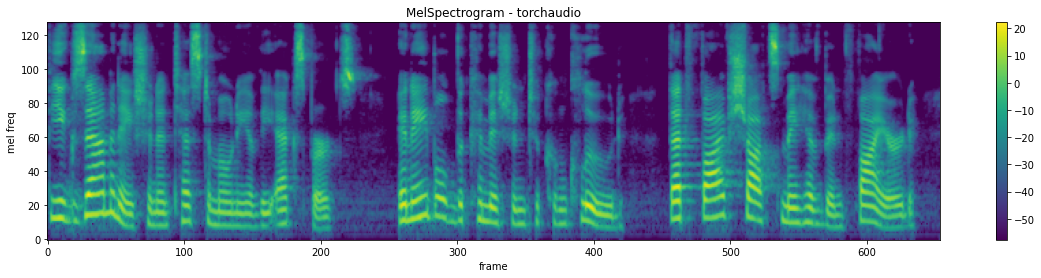

<Figure size 720x2160 with 0 Axes>

torch.Size([1, 128, 654])


In [5]:
plt.rcParams["figure.figsize"] = (20,4)
n_fft = 1024
win_length = None
hop_length = int(512/2)
n_mels = 128

mel_spectrogram = T.MelSpectrogram(
    sample_rate=sample_rate,
    n_fft=n_fft,
    win_length=win_length,
    hop_length=hop_length,
    center=True,
    pad_mode="reflect",
    power=2.0,
    norm='slaney',
    onesided=True,
    n_mels=n_mels,
    mel_scale="htk",
)

melspec = mel_spectrogram(waveform)
plot_spectrogram(
    melspec[0], title="MelSpectrogram - torchaudio", ylabel='mel freq')
print(melspec.shape)
ipd.Audio("/content/LJ037-0171.wav")

In [93]:
net = Net(1,2)

In [94]:
print(melspec.shape, net(melspec.unsqueeze(0)).shape)

torch.Size([1, 8, 128, 327]) torch.Size([1, 8, 128, 327]) torch.Size([1, 8, 128, 327]) torch.Size([1, 2, 128, 327]) torch.Size([1, 8, 128, 327]) torch.Size([1, 8, 128, 327])
torch.Size([1, 128, 327]) torch.Size([1, 44, 128, 327])


In [ ]:
for i in range(10):
    plot_spectrogram( 
        net(melspec.unsqueeze(0)).squeeze(0)[i].detach().numpy() , title="MelSpectrogram - torchaudio", ylabel='mel freq')
    print(melspec.shape)    
# ipd.Audio("/content/LJ037-0171.wav")

## Going Deeper

In [87]:
from torch.nn.modules.activation import ReLU
from torch.nn.modules.batchnorm import BatchNorm2d


class SimpleConvBlock(nn.Module):
  def __init__(self, in_channels, out_channels, **kwargs):
    super(SimpleConvBlock, self).__init__()
    self.conv = nn.Sequential(
        nn.Conv2d(in_channels,
                  out_channels,
                  **kwargs),
        nn.BatchNorm2d(out_channels),
        nn.ReLU()          
    )
  def forward(self, x):
    return self.conv(x)


class DilatedConvBlock(nn.Module):
  def __init__(self, in_channels, out_channels, dilation, **kwargs):
    super(DilatedConvBlock, self).__init__()
    self.conv = nn.Sequential(
        nn.Conv2d(in_channels,
                  out_channels,
                  dilation=dilation, 
                  **kwargs),
        nn.BatchNorm2d(out_channels),
        nn.ReLU() 
    )
  def forward(self, x):
    return self.conv(x)



class OnebyOneConvBlock(nn.Module):
  def __init__(self, in_channels, out_channels):
    super(OnebyOneConvBlock, self).__init__()
    self.conv = nn.Sequential(
        nn.Conv2d(in_channels, 
                  out_channels,
                  1,
                  1,
                  0),
        nn.BatchNorm2d(out_channels),
        nn.ReLU()          
    )
  def forward(self, x):
    return self.conv(x)






class Net(nn.Module):
  def __init__(self, in_channels, out_channels):
    super(Net, self).__init__()
    self.in_channels = in_channels
    self.out_channels = out_channels

    self.fc = nn.Linear(75*10*23*out_channels, 4096)

    self.simpleconv3x3 = SimpleConvBlock(self.in_channels,
                                      self.out_channels,
                                      kernel_size=3,
                                      stride=1,
                                      padding=1)

    self.simpleconv5x5 = SimpleConvBlock(self.in_channels,
                                      self.out_channels,
                                      kernel_size=5,
                                      stride=1,
                                      padding=2)
    
    self.simpleconv7x7 = SimpleConvBlock(self.in_channels,
                                      self.out_channels,
                                      kernel_size=7,
                                      stride=1,
                                      padding=3)   



    self.DilatedConvBlock2x2 = DilatedConvBlock(self.in_channels,
                                             self.out_channels,
                                             kernel_size = 3,
                                             stride = 1,
                                             padding = 2,
                                             dilation = 2)

    self.DilatedConvBlock4x4 = DilatedConvBlock(self.in_channels,
                                             self.out_channels,
                                             kernel_size = 3,
                                             stride = 1,
                                             padding = 4,
                                             dilation = 4)


    self.OnebyOneConvBlock = OnebyOneConvBlock(self.out_channels, 
                                               self.out_channels * 2)
    


    self.ConvList = nn.ModuleList()
    for i in range(1,5):
      self.ConvList.append(nn.Conv2d(
              self.out_channels * 15 *i ,
              self.out_channels * 15 *(i+1),
              3,
              2,
              2 
          ))
      self.ConvList.append(nn.BatchNorm2d(self.out_channels * 15 *(i+1)))
      self.ConvList.append(nn.ReLU())
   

  def forward(self, x):
      x = torch.cat([self.simpleconv3x3(x),
                     self.simpleconv5x5(x),
                     self.simpleconv7x7(x),
                     self.DilatedConvBlock2x2(x),
                     self.DilatedConvBlock4x4(x),

                     self.OnebyOneConvBlock(self.simpleconv3x3(x)),
                     self.OnebyOneConvBlock(self.simpleconv5x5(x)),
                     self.OnebyOneConvBlock(self.simpleconv7x7(x)),
                     self.OnebyOneConvBlock(self.DilatedConvBlock2x2(x)),
                     self.OnebyOneConvBlock(self.DilatedConvBlock4x4(x))] , axis = 1)
      for i in self.ConvList:
        x = i(x)
      x = x.reshape(x.shape[0], -1)
      x = self.fc(x)
      return x 



In [88]:
net = Net(1,10)

In [89]:
print(melspec.shape,"---", net(melspec.unsqueeze(0)).shape)

torch.Size([1, 128, 327]) --- torch.Size([1, 4096])


In [ ]:
for i in range(12):
    plot_spectrogram( 
        net(melspec.unsqueeze(0)).squeeze(0)[i].detach().numpy() , title="MelSpectrogram - torchaudio", ylabel='mel freq')
    print(melspec.shape)   

## Full VAE Code

In [6]:
from torch.nn.modules.activation import ReLU
from torch.nn.modules.batchnorm import BatchNorm2d
import torch
import torch.nn as nn
import torch.nn.functional as F

class SimpleConvBlock(nn.Module):
  def __init__(self, in_channels, out_channels, **kwargs):
    super(SimpleConvBlock, self).__init__()
    self.conv = nn.Sequential(
        nn.Conv2d(in_channels,
                  out_channels,
                  **kwargs),
        nn.BatchNorm2d(out_channels),
        nn.ReLU()          
    )
  def forward(self, x):
    return self.conv(x)


class DilatedConvBlock(nn.Module):
  def __init__(self, in_channels, out_channels, dilation, **kwargs):
    super(DilatedConvBlock, self).__init__()
    self.conv = nn.Sequential(
        nn.Conv2d(in_channels,
                  out_channels,
                  dilation=dilation, 
                  **kwargs),
        nn.BatchNorm2d(out_channels),
        nn.ReLU() 
    )
  def forward(self, x):
    return self.conv(x)



class OnebyOneConvBlock(nn.Module):
  def __init__(self, in_channels, out_channels):
    super(OnebyOneConvBlock, self).__init__()
    self.conv = nn.Sequential(
        nn.Conv2d(in_channels, 
                  out_channels,
                  1,
                  1,
                  0),
        nn.BatchNorm2d(out_channels),
        nn.ReLU()          
    )
  def forward(self, x):
    return self.conv(x)






class Encoder(nn.Module):
  def __init__(self, in_channels, out_channels):
    super(Encoder, self).__init__()
    self.in_channels = in_channels
    self.out_channels = out_channels

    self.fc_mu = nn.Linear(75*8*40*out_channels, 4096)
    self.fc_logvar = nn.Linear(75*8*40*out_channels, 4096)

    self.simpleconv3x3 = SimpleConvBlock(self.in_channels,
                                      self.out_channels,
                                      kernel_size=3,
                                      stride=1,
                                      padding=1)

    self.simpleconv5x5 = SimpleConvBlock(self.in_channels,
                                      self.out_channels,
                                      kernel_size=5,
                                      stride=1,
                                      padding=2)
    
    self.simpleconv7x7 = SimpleConvBlock(self.in_channels,
                                      self.out_channels,
                                      kernel_size=7,
                                      stride=1,
                                      padding=3)   



    self.DilatedConvBlock2x2 = DilatedConvBlock(self.in_channels,
                                             self.out_channels,
                                             kernel_size = 3,
                                             stride = 1,
                                             padding = 2,
                                             dilation = 2)

    self.DilatedConvBlock4x4 = DilatedConvBlock(self.in_channels,
                                             self.out_channels,
                                             kernel_size = 3,
                                             stride = 1,
                                             padding = 4,
                                             dilation = 4)


    self.OnebyOneConvBlock = OnebyOneConvBlock(self.out_channels, 
                                               self.out_channels * 2)
    


    self.ConvList = nn.ModuleList()
    for i in range(1,5):
      self.ConvList.append(nn.Conv2d(
              self.out_channels * 15 *i ,
              self.out_channels * 15 *(i+1),
              4,
              2,
              1 
          ))
      # self.ConvList.append(nn.BatchNorm2d(self.out_channels * 15 *(i+1)))
      # self.ConvList.append(nn.ReLU())
   

  def forward(self, x):
      x = torch.cat([self.simpleconv3x3(x),
                     self.simpleconv5x5(x),
                     self.simpleconv7x7(x),
                     self.DilatedConvBlock2x2(x),
                     self.DilatedConvBlock4x4(x),

                     self.OnebyOneConvBlock(self.simpleconv3x3(x)),
                     self.OnebyOneConvBlock(self.simpleconv5x5(x)),
                     self.OnebyOneConvBlock(self.simpleconv7x7(x)),
                     self.OnebyOneConvBlock(self.DilatedConvBlock2x2(x)),
                     self.OnebyOneConvBlock(self.DilatedConvBlock4x4(x))] , axis = 1)
      print(x.shape)
      for i in self.ConvList:
        x = i(x)
        print(x.shape, i)
      x = x.reshape(x.shape[0], -1)
      # x = self.fc(x)
      # return x 
      x_mu = self.fc_mu(x)
      x_logvar = self.fc_logvar(x)
      return x_mu, x_logvar







class Decoder(nn.Module):
    def __init__(self, out_channels):
        super(Decoder, self).__init__()
        self.fc = nn.Linear(in_features=4096, out_features=75*8*40*out_channels)
        self.conv1 = nn.ConvTranspose2d(in_channels=750, out_channels=150, kernel_size=4, stride=2, padding=1)
        self.conv2 = nn.ConvTranspose2d(in_channels=150, out_channels=30, kernel_size=4, stride=2, padding=1)
        self.conv3 = nn.ConvTranspose2d(in_channels=30, out_channels=20, kernel_size=4, stride=2, padding=1)
        self.conv4 = nn.ConvTranspose2d(in_channels=20, out_channels=1, kernel_size=4, stride=2, padding=1)
        # self.conv5 = nn.ConvTranspose2d(in_channels=10, out_channels=10, kernel_size=3, stride=1, padding=1)
        # self.conv6 = nn.ConvTranspose2d(in_channels=10, out_channels=10, kernel_size=3, stride=1, padding=1)
        # self.conv7 = nn.ConvTranspose2d(in_channels=10, out_channels=10, kernel_size=3, stride=1, padding=2)
        # self.conv8 = nn.ConvTranspose2d(in_channels=10, out_channels=1, kernel_size=3, stride=1, padding=4)
            
    def forward(self, x):
        x = self.fc(x)
        x = x.view(x.size(0), 750, 8, 40) # unflatten batch of feature vectors to a batch of multi-channel feature maps
        print(x.shape)
        x = F.relu(self.conv1(x))
        print(x.shape)
        x = F.relu(self.conv2(x))
        print(x.shape)
        x = F.relu(self.conv3(x))
        # print(x.shape)
        # x = F.relu(self.conv4(x))
        # print(x.shape)
        # x = F.relu(self.conv5(x))
        # print(x.shape)
        # x = F.relu(self.conv6(x))
        # print(x.shape)
        # x = F.relu(self.conv7(x))
        x = torch.sigmoid(self.conv4(x)) # last layer before output is sigmoid, since we are using BCE as reconstruction loss
        return x
    

In [9]:
de = None

In [10]:
a = torch.rand(1,4096)
de = Decoder(10)
re = de(a)

torch.Size([1, 750, 8, 40])
torch.Size([1, 150, 16, 80])
torch.Size([1, 30, 32, 160])


In [7]:
net = None

In [8]:
net = Encoder(1,10)

KeyboardInterrupt: ignored

In [8]:
net(melspec.unsqueeze(0))[0].shape

torch.Size([1, 150, 128, 654])
torch.Size([1, 300, 64, 327]) Conv2d(150, 300, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
torch.Size([1, 450, 32, 163]) Conv2d(300, 450, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
torch.Size([1, 600, 16, 81]) Conv2d(450, 600, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
torch.Size([1, 750, 8, 40]) Conv2d(600, 750, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))


torch.Size([1, 4096])

In [12]:
print(sum(p.numel() for p in de.parameters()))

985162121


In [20]:
import torch.nn.functional as F
# pad(left, right, top, bottom)
new_data = F.pad(input=re, pad=(0, 14, 0, 0), mode='constant', value=0)
print(new_data.shape)

torch.Size([1, 1, 128, 654])


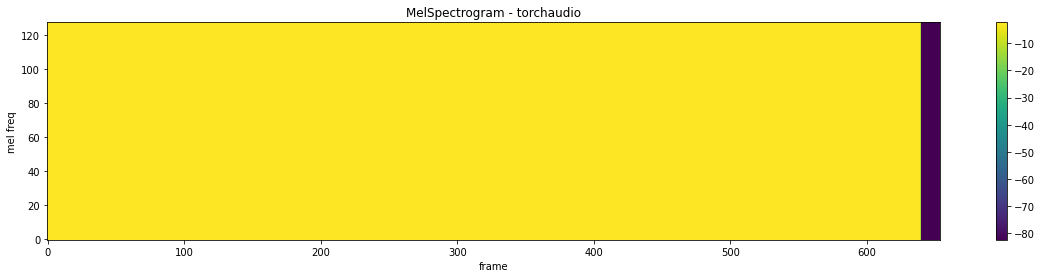

<Figure size 720x2160 with 0 Axes>

torch.Size([1, 128, 654])


In [28]:
plot_spectrogram( 
    new_data.squeeze(0).detach().numpy()[0], title="MelSpectrogram - torchaudio", ylabel='mel freq')
print(melspec.shape)    
ipd.Audio("/content/LJ037-0171.wav")

In [26]:
melspec.shape

torch.Size([1, 128, 654])

In [24]:
torch.tensor(new_data.squeeze(0).detach().numpy()).shape

torch.Size([1, 128, 654])